# Import Libraries

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
t_shirt = cv2.imread('white t-shirt.jpg')
jeans = cv2.imread('jeans.jpg')

# Images for experiments
t_shirt_with_man = cv2.imread('t shirt with man.jpg')
white_t_shirt = cv2.imread('white t shirt.jpg')
white_t_shirt_2 = cv2.imread('white t shirt 2.jpg')
yellow_t_shirt = cv2.imread('yellow t shirt.jpg')

In [ ]:
def render_image(image):
    plt.figure(figsize = (8, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def convert_to_RGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Show Images

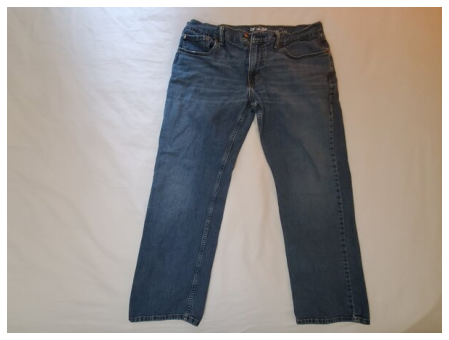

In [ ]:
render_image(convert_to_RGB(jeans))

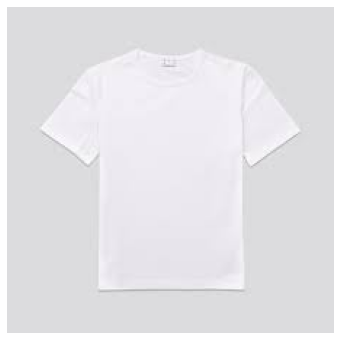

In [ ]:
render_image(convert_to_RGB(white_t_shirt))

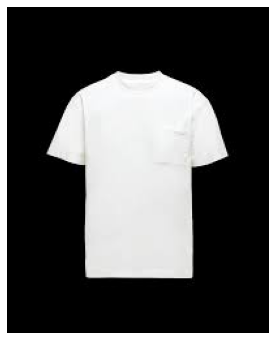

In [ ]:
render_image(convert_to_RGB(white_t_shirt_2))

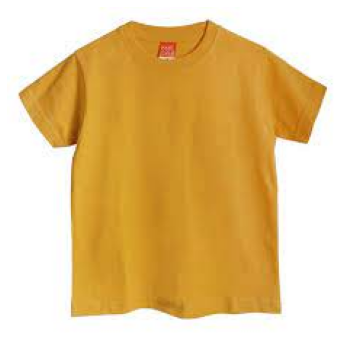

In [ ]:
render_image(convert_to_RGB(yellow_t_shirt))

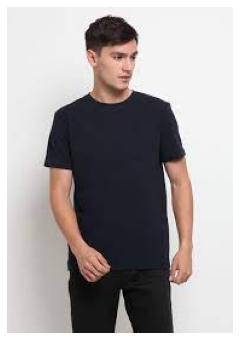

In [ ]:
render_image(convert_to_RGB(t_shirt_with_man))

# T-Shirt Detection

In [ ]:
def get_threshold(gray_image, type):
    if type == 'dark':
        return cv2.threshold(gray_image, 115, 255, cv2.THRESH_BINARY_INV)[1]
    elif type == 'light':
        return cv2.threshold(gray_image, 75, 255, cv2.THRESH_BINARY)[1]

def detect_object(image_path, type):
    image = cv2.imread(image_path)
    gray = convert_to_grayscale(image)
    
    thresh = get_threshold(gray, type)
    
    # Create a small matrix
    kernel = np.ones((5,5),np.uint8)
    
    # Use the kernel to perform morphological opening
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
    
    if type == 'dark':
        thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Find the contours
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    
    # Create a blank image
    blank_image = np.ones((450,600,3), np.uint8)
    
    # Set the minimum area for a contour
    min_area = 5000
    
    # Draw the contours on the original image and the blank image
    for c in cnts:
        area = cv2.contourArea(c)
        if area > min_area:
            cv2.drawContours(image,[c], 0, (36,255,12), 2)
            cv2.drawContours(blank_image,[c], 0, (255,255,255), 2)
        
    print(cnts)
    
    # Convert the blank image to grayscale for corner detection
    gray = convert_to_grayscale(blank_image)
    
    # Detect corners using the contours
    corners = cv2.goodFeaturesToTrack(image=gray,maxCorners=25,qualityLevel=0.20,minDistance=50) # Determines strong corners on an image
    
    # Draw the corners on the original image
    for corner in corners:
        x,y = corner.ravel()
        cv2.circle(image,(x,y),10,(0,0,255),-1)
    
    # Display the image
    render_image(convert_to_RGB(image))
    render_image(convert_to_RGB(blank_image))
    
    # Save the image that has the contours and corners
    contour_image_filename = 'contour' + image_path
    cv2.imwrite(contour_image_filename, image)
    
    # Save the image that has just the contours
    contour_blank_image_filename = 'contour' + image_path + 'blank'
    cv2.imwrite(contour_blank_image_filename, blank_image)

In [ ]:
detect_object('blabla.jpeg', 'dark')

[]


TypeError: ignored

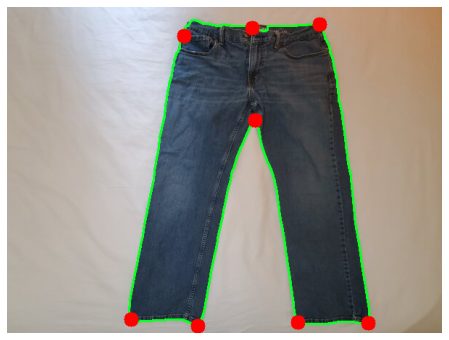

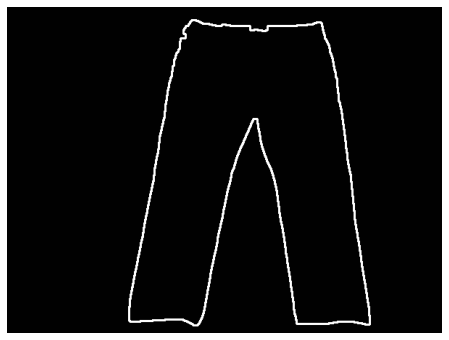

In [ ]:
detect_object('jeans.jpg', 'dark')

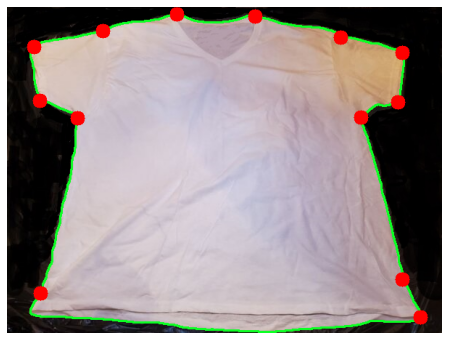

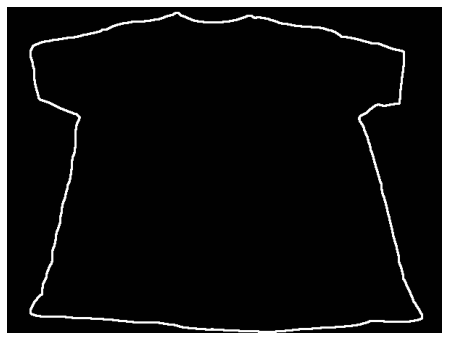

In [ ]:
detect_object('white t-shirt.jpg', 'light')

[array([[[ 83,  66]],

       [[ 83,  70]],

       [[ 84,  71]],

       [[ 85,  71]],

       [[ 88,  74]],

       [[ 92,  74]],

       [[ 93,  75]],

       [[ 93,  79]],

       [[ 92,  80]],

       [[ 79,  80]],

       [[ 78,  79]],

       [[ 76,  79]],

       [[ 75,  78]],

       [[ 74,  78]],

       [[ 73,  77]],

       [[ 72,  77]],

       [[ 69,  74]],

       [[ 64,  74]],

       [[ 63,  75]],

       [[ 62,  75]],

       [[ 61,  76]],

       [[ 60,  76]],

       [[ 59,  77]],

       [[ 58,  77]],

       [[ 57,  78]],

       [[ 56,  78]],

       [[ 55,  79]],

       [[ 54,  79]],

       [[ 52,  81]],

       [[ 50,  81]],

       [[ 49,  82]],

       [[ 48,  82]],

       [[ 47,  83]],

       [[ 46,  83]],

       [[ 45,  84]],

       [[ 44,  84]],

       [[ 42,  86]],

       [[ 41,  86]],

       [[ 40,  87]],

       [[ 40,  88]],

       [[ 39,  89]],

       [[ 39,  93]],

       [[ 38,  94]],

       [[ 38,  97]],

       [[ 37,  98]],

       [[

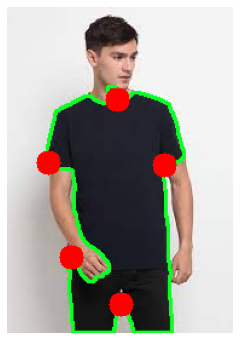

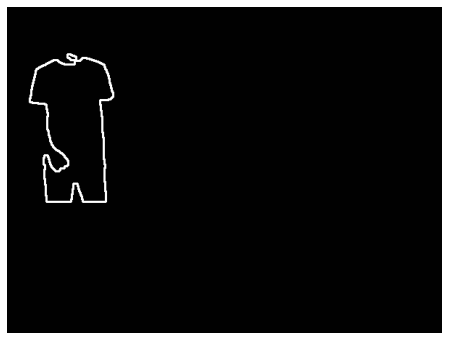

error: ignored

In [ ]:
detect_object('t shirt with man.jpg', 'dark')

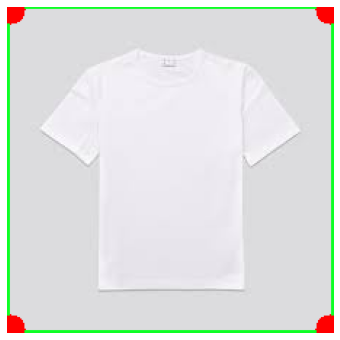

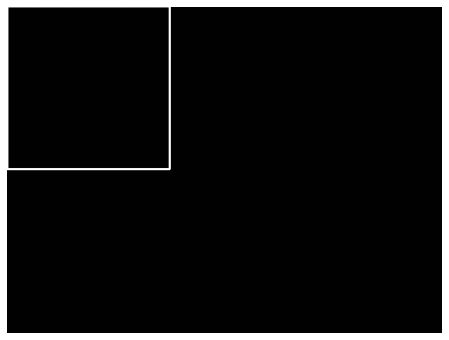

In [ ]:
detect_object('white t shirt.jpg', 'light')

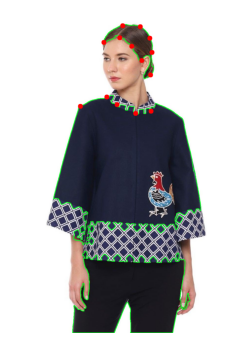

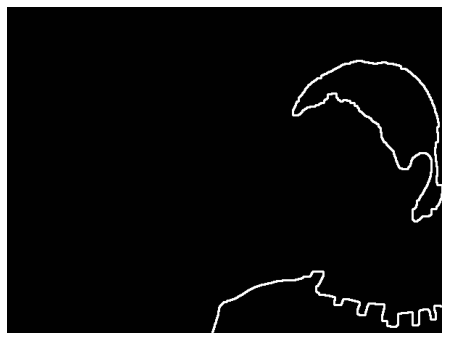

In [ ]:
detect_object('11.jpg', 'dark')

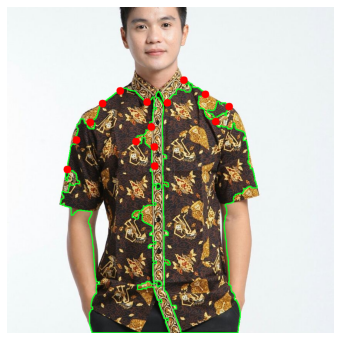

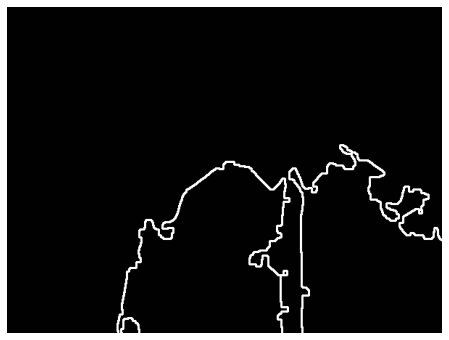

In [ ]:
detect_object('82.jpg', 'dark')

# OpenCV Haarcascades

#### Upper Body Classifier

In [ ]:
upperbody_classifier = cv2.CascadeClassifier('haarcascade_upperbody.xml')
upperbody_classifier

<CascadeClassifier 0x7f52196baf30>

In [ ]:
image_11 = cv2.imread('11.jpg')

In [ ]:
found_upperbody = upperbody_classifier.detectMultiScale(image_11, minSize = (1, 1))
found_upperbody

array([[ 87,   7, 764, 625],
       [562, 878,  36,  29],
       [346, 911,  29,  24],
       [403, 862,  50,  40]], dtype=int32)

In [ ]:
if len(found_upperbody) > 0:
    for x, y, width, height in found_upperbody:
        start_point = (x, y)
        end_point = (x + width, y + height)
        color = (0, 255, 0) # green
        cv2.rectangle(image_11, start_point, end_point, color = color, thickness = 10)

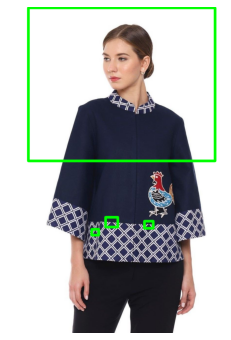

In [ ]:
render_image(convert_to_RGB(image_11))

#### Full Body Classifier

In [ ]:
fullbody_classifier = cv2.CascadeClassifier('haarcascade_fullbody.xml')
fullbody_classifier

<CascadeClassifier 0x7f52199e4130>

In [ ]:
found_fullbody = fullbody_classifier.detectMultiScale(image_11, minSize = (1, 1))
found_fullbody

array([[328, 511,  63, 127]], dtype=int32)

In [ ]:
if len(found_fullbody) > 0:
    for x, y, width, height in found_fullbody:
        start_point = (x, y)
        end_point = (x + width, y + height)
        color = (0, 0, 255) # green
        cv2.rectangle(image_11, start_point, end_point, color = color, thickness = 10)

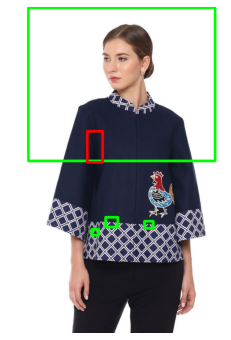

In [ ]:
render_image(convert_to_RGB(image_11))